# MELODIES-MONET example with MOPITT CO

First lets just import the driver

In [1]:
import sys
sys.path.append('../../')
from melodies_monet import driver

### Driver class

First, we initialize the python driver analysis class. It consists of 3 main components/processes; 1. model instances, 2. observation instances, 3. a paired instance of both.  This helps us set up the comparisons.

In [2]:
an = driver.analysis()

### Control File

Read in all the comparison definitions from the yaml control file.

There are pairing options that should now be specified in the analysis section.


In [3]:
an.control = '../yaml/control_ufsaqm_mopitt.yaml'
an.read_control()
#an.control_dict
#an.control_dict['obs']['mopitt']

### Open Obs

Load all the data files. Satellites data is usually hdf or netCDF, although sometimes are saved as ascii or other unusual formats. Note the data needs to be already accessible on the system you are working on. Future functionality will include OpenDap. 

The Monetio MOPITT level 3 reader works on daily and monthly level 3 files because they have the same format.

In [4]:
an.open_obs()

Reading MOPITT
/scratch1/BMC/rcm2/mbruckner/mopitt/v009_daily/MOP03J-20230627-L3V5.10.3.he5


/scratch1/BMC/rcm2/mbruckner/mopitt/v009_daily/MOP03J-20230628-L3V5.10.3.he5


We can look at the data we just loaded based on the observation names defined in the yaml dictionary.

### Loading the model data

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames. Note it can open multiple files easily by including hot keys

The optional boolean argument 'is_global' should be used for analyses using regional model data.

In [5]:
an.open_models()

rrfs
/scratch1/BMC/rcm2/rhs/monet_example/AEROMMA/UFS-AQM/cmaq54_OriRave1/aqm.202306*/12/aqm.t12z.dyn.*.nc
**** Reading RRFS-CMAQ model output...


### Pair the data

Pairing of model data with MOPITT L3 data in Melodies Monet is a bilinear interpolation from the model grid to the MOPITT grid with the xesmf regridding tools. As of now, the 'apply_ak' satellite pairing option must be set to True in the yaml. Pairing without the averaging kernel is not supported for this dataset at this time.

Pairing also only works when the model data is at the same or higher time resolution than the observation data. Eg, MOPITT is monthly while model is 6H.
When the pairing option mod_to_overpass is specified, model data will be processed to the (hardwired) local satellite overpass time. For MOPITT this is approximately 10:30 A.M. This step occurs prior to the spatial interpolation steps. 

MOPITT pairing utility also auto-applies a scaling factor to the paired model columns and observation columns so that the units are $10^{18}$ molec./$cm^{2}$. 

In [6]:
an.pair_data()

1, in pair data
sampling model to 10:30 local overpass time


### Generate Plots

Generate plots as defined in yaml

-1.7300205755233764 1.7300205755233764


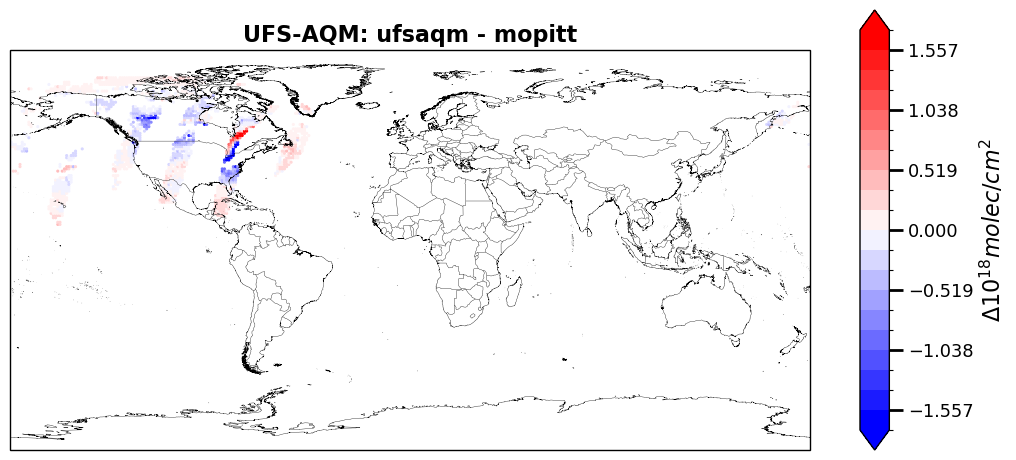

In [7]:
an.plotting()